In [180]:
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Data Cleaning

In [183]:
# Gaining an idea of how data is
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [185]:
data.shape

(58645, 13)

In [187]:
# Checking for null values 
data.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [189]:
# Checking for data types 
# Need to convert Objects to ML ready variables (Int or Floats)
print(data.dtypes)
print('\n')
print('Object Features that need to be converted are:')
list(data.select_dtypes(include='object').columns)

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


Object Features that need to be converted are:


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [191]:
list(data.select_dtypes(include='object').columns)


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [193]:
# Copying Data into data2 to keep source data untouched

data2 = data.copy()

In [195]:
# Converting each Object feature into ML friendly feature

# Identify unique variables for home ownership
print(data2['person_home_ownership'].unique())
print('\n')
print(data2['loan_intent'].unique())
print('\n')
print(data2['loan_grade'].unique())
print('\n')
print(data2['cb_person_default_on_file'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']


['B' 'C' 'A' 'D' 'E' 'F' 'G']


['N' 'Y']


In [197]:
# THere are 89 Rows of OTHER 
data2[data2['person_home_ownership']=='OTHER']

# Drop "OTHER" since it represents less than 0.001% of the data
data2 = data2[data2['person_home_ownership']!='OTHER']

In [199]:
# Utilize LabelEncoder to encode the string objects
list(data2['loan_intent'].unique())

# Initialize labelEncoder 
encoder = LabelEncoder() 

# Fit and transform the data for 'loan_intent' column
data2['loan_intent'] = encoder.fit_transform(data2['loan_intent'])

# Fit and transform the data for 'loan_grade' column
data2['loan_grade'] = encoder.fit_transform(data2['loan_grade'])


# HOME OWNERSHIP DATA CLEANING

# Get Unique classes from the "person_home_ownership"
unique_values = data2['person_home_ownership'].unique()
home_ownership_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for person_home_ownership classes:", home_ownership_dict)

# Fit and transform the data for 'person_home_ownership' column
data2['person_home_ownership'] = encoder.fit_transform(data2['person_home_ownership'])


# CB_PERSON_DEFAULT_ON_FILE

# Get Unique classes from the "person_home_ownership"
unique_values = data2['cb_person_default_on_file'].unique()
cb_person_default_on_file_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for cb_person_default_on_file classes:", cb_person_default_on_file_dict)

# Fit and transform the data for 'person_home_ownership' column
data2['cb_person_default_on_file'] = encoder.fit_transform(data2['cb_person_default_on_file'])

data2.head()


Dictionary for person_home_ownership classes: {0: 'RENT', 1: 'OWN', 2: 'MORTGAGE'}
Dictionary for cb_person_default_on_file classes: {0: 'N', 1: 'Y'}


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,2,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,1,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,1,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,2,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,2,2.0,3,0,6000,6.92,0.10,0,3,0


In [201]:
# Verifying Data types 
print(data2.dtypes)

print('\n')
print('Now that data cleaning is complete, time for data exploration')

id                              int64
person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
loan_status                     int64
dtype: object


Now that data cleaning is complete, time for data exploration


# Data Exploration

In [204]:
# Data distribution

data2.describe()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,58556.000000,58556.000000,5.855600e+04,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000,58556.000000
mean,29322.958143,27.551523,6.404149e+04,1.098538,4.701209,2.518820,1.066347,9216.323724,10.676532,0.159229,0.148354,5.813819,0.142342
std,16929.710966,6.032287,3.793975e+04,0.967841,3.958525,1.722754,1.046092,5563.962614,3.035149,0.091697,0.355453,4.029183,0.349404
min,0.000000,20.000000,4.200000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,14660.750000,23.000000,4.200000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,7.880000,0.090000,0.000000,3.000000,0.000000
50%,29324.500000,26.000000,5.800000e+04,2.000000,4.000000,3.000000,1.000000,8000.000000,10.750000,0.140000,0.000000,4.000000,0.000000
75%,43987.250000,30.000000,7.560000e+04,2.000000,7.000000,4.000000,2.000000,12000.000000,12.990000,0.210000,0.000000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,2.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,1.000000


In [206]:
print('There are outliers here. For example, a 123 year old, working for 123 years? Need to drop some outliers ')

There are outliers here. For example, a 123 year old, working for 123 years? Need to drop some outliers 


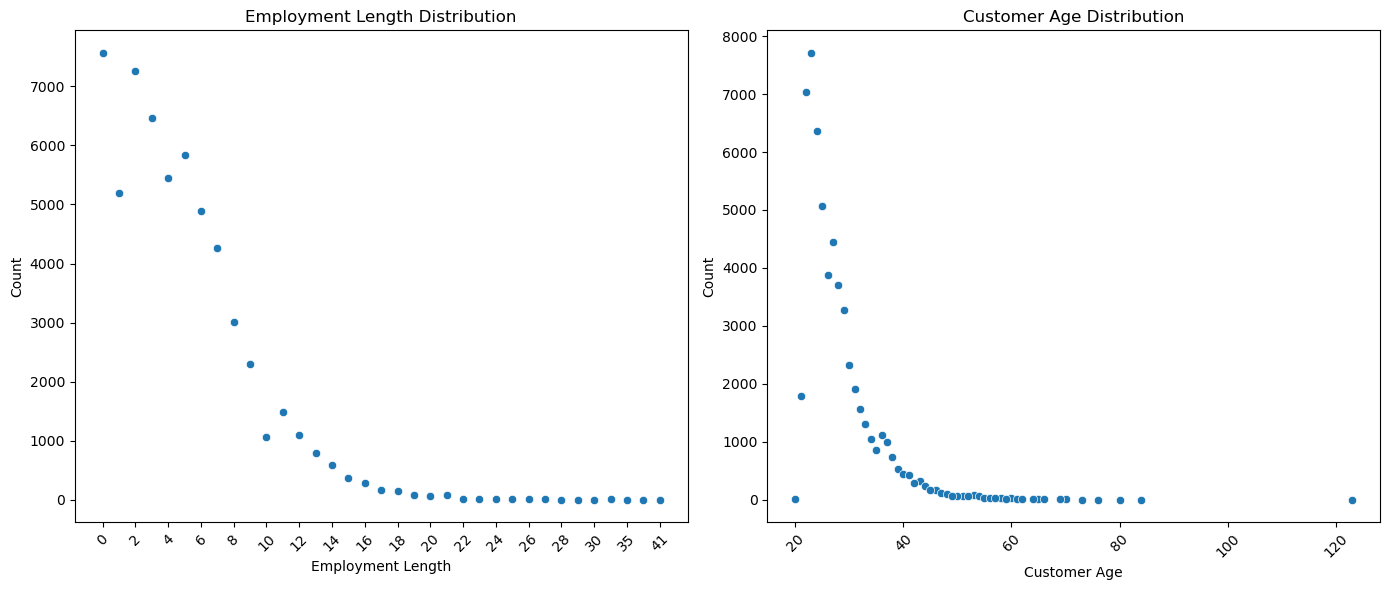

Now, the outliers have been removed. As shown in the graphs, as customer's age and employment length increases, there are less occurences of them getting loans.


This is expected, as its more difficult to get financing in retirement years, and usually older customers have savings/investments they can rely on, rather get getting a new loan 


In [236]:
import matplotlib.pyplot as plt
import seaborn as sns

# First: Clean up the data and remove outliers
data2_clean = data2[data2['person_emp_length'] != 123]

# Create count dataframes
count_df = data2_clean['person_emp_length'].value_counts().reset_index()
count_df.columns = ['person_emp_length', 'count']

count_df2 = data2_clean['person_age'].value_counts().reset_index()
count_df2.columns = ['person_age', 'count']

# Convert employment length to string for cleaner x-tick labels
count_df['person_emp_length'] = count_df['person_emp_length'].astype(int).astype(str)

# Sort by employment length
count_df = count_df.sort_values(by='person_emp_length', key=lambda x: x.astype(int))

# Set up 1 row, 2 column subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- First subplot: Employment Length
sns.scatterplot(x='person_emp_length', y='count', data=count_df, ax=axes[0])
axes[0].set_title("Employment Length Distribution")
axes[0].set_xlabel("Employment Length")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

# Optional: Space out x-ticks if needed
xticks = axes[0].get_xticks()
axes[0].set_xticks(xticks[::2])

# --- Second subplot: Customer Age
sns.scatterplot(x='person_age', y='count', data=count_df2, ax=axes[1])
axes[1].set_title("Customer Age Distribution")
axes[1].set_xlabel("Customer Age")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Drop "Outliers" since it misrepresents data
data2 = data2[data2['person_emp_length'] != 123]

print("Now, the outliers have been removed. As shown in the graphs, as customer's age and employment length increases, there are less occurences of them getting loans.")
print('\n')
print("This is expected, as its more difficult to get financing in retirement years, and usually older customers have savings/investments they can rely on, rather get getting a new loan ")

In [232]:
data2.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,2,0.0,1,1,6000,11.49,0.17,0,14,0
1,1,22,56000,1,6.0,3,2,4000,13.35,0.07,0,2,0
2,2,29,28800,1,8.0,4,0,6000,8.90,0.21,0,10,0
3,3,30,70000,2,14.0,5,1,12000,11.11,0.17,0,5,0
4,4,22,60000,2,2.0,3,0,6000,6.92,0.10,0,3,0


<Axes: >

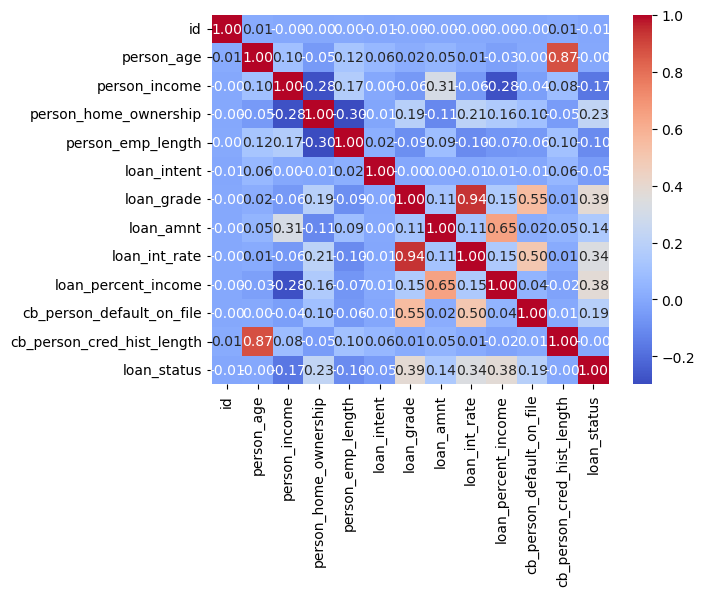

In [240]:
# Correlation Heatmap to understand better relationships

corr = data2.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)


### KEY FINDINGS:

This heatmap can show which variables are correlated with one another.

1.) person's age and credit history length are highly positively correlated. This is logical which indicates the older a person is, the longer the credit history would typically be. 

2.) Loan Grade and Interest rate are almost perfectly correlated. If the loan grade is classified as being more risky, the interest rate would be higher, to compensate for the added risk taken on by the bank. 

3.) Loan interest rate and person default on file has a somewhat positive correlation. It can signify that as interest rates increase, it would be more difficult for a customer to pay back the loan. 

### NEXT STEPS

Since this is a supervised, classification problem, the algorithms below will be used: 1.) Logistic Regression 2.) Random Forest Classifier 

The goal is to predict loan status! So, I will split this inital dataset into train/test,

Once the model is built, the results will be evaluated against the other models. 

Finally, the best performing model will be used to predict the provided test dataset, that does not have the labeled variable.

# ML Algorithms




In [266]:
# LOGISTIC REGRESSION (With Grid Search)

# Split the dataset into features (x) and (y)
X = data2.drop(columns=['loan_status'])
y= data2['loan_status']


# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear', 'saga'],  # Solvers
    'max_iter': [100, 200, 300]  # Number of iterations
}

log_model = LogisticRegression(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_log_model = grid_search.best_estimator_

# Make Predictions 
y_pred = best_log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Convert to a pandas DataFrame with labeled rows and columns
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])

print(conf_matrix_df)

print('\n')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)



Accuracy: 0.8989838613269575


       Predicted True  Predicted False
True             9841              246
False             937              687


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10087
           1       0.74      0.42      0.54      1624

    accuracy                           0.90     11711
   macro avg       0.82      0.70      0.74     11711
weighted avg       0.89      0.90      0.89     11711



In [270]:
# Finding the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

print('\n')

# There are more instances of Non-defaults than defaults in this model
print(y.value_counts(normalize=True))

Best Hyperparameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


loan_status
0    0.85767
1    0.14233
Name: proportion, dtype: float64


In [274]:
# Using ROC_AUC Score to determine how well this model is performing.

# Given its imbalanced data, its a good idea to use this score. 

from sklearn.metrics import roc_auc_score

y_proba = best_log_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')


ROC AUC Score: 0.8875


#### Analysis: 

Overall, there are less instances of a loan defaults in this training dataset. The ROC AUC score was used to evaluate the model's overall accuracy given the imbalance in both classes (1 & 0), and the model still produced good results. 

#### Next Steps: 

Now, I will review/transform the test dataset, and use the model produced above to predict what class each customer would be. Note, this test dataset is has unlabeled target variables. Also, since this is test data, any outliers would not be dropped. The variables would only be transformed into a ML friendly format. This is how the model will keep its reproducability to unseen data. 


In [281]:
test.head()
test.shape

(39098, 12)

In [286]:
# Data cleaning for test data

# Utilize LabelEncoder to encode the string objects
list(test['loan_intent'].unique())

# Initialize labelEncoder 
encoder = LabelEncoder() 

# Fit and transform the data for 'loan_intent' column
test['loan_intent'] = encoder.fit_transform(test['loan_intent'])

# Fit and transform the data for 'loan_grade' column
test['loan_grade'] = encoder.fit_transform(test['loan_grade'])


# HOME OWNERSHIP DATA CLEANING

# Get Unique classes from the "person_home_ownership"
unique_values = test['person_home_ownership'].unique()
home_ownership_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for person_home_ownership classes:", home_ownership_dict)

# Fit and transform the data for 'person_home_ownership' column
test['person_home_ownership'] = encoder.fit_transform(test['person_home_ownership'])


# CB_PERSON_DEFAULT_ON_FILE

# Get Unique classes from the "person_home_ownership"
unique_values = test['cb_person_default_on_file'].unique()
cb_person_default_on_file_dict = {i: unique_values[i] for i in range(len(unique_values))}

# Print the dictionary for reference
print("Dictionary for cb_person_default_on_file classes:", cb_person_default_on_file_dict)

# Fit and transform the data for 'person_home_ownership' column
test['cb_person_default_on_file'] = encoder.fit_transform(test['cb_person_default_on_file'])

test.head()


Dictionary for person_home_ownership classes: {0: 'RENT', 1: 'MORTGAGE', 2: 'OWN', 3: 'OTHER'}
Dictionary for cb_person_default_on_file classes: {0: 'N', 1: 'Y'}


,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3.0,2,5,25000,15.76,0.36,0,2
1,58646,26,96000,0,6.0,4,2,10000,12.68,0.10,1,4
2,58647,26,30000,3,5.0,5,4,4000,17.19,0.13,1,2
3,58648,33,50000,3,4.0,0,0,7000,8.90,0.14,0,7
4,58649,26,102000,0,8.0,2,3,15000,16.32,0.15,1,4


Test dataset was preprocessed, now will prep for the model itself, to predict target variable 

In [289]:
# Drop the target column if it exists in the test dataset
X_test = test.drop(columns=['loan_status'], errors='ignore')  # Drop target if it exists

# Step 1: Apply same preprocessing to test dataset (same scaling as used for training data)
test_data_scaled = scaler.transform(X_test)

# Step 2: Use the trained model to make predictions on the test dataset
y_pred_test = best_log_model.predict(test_data_scaled)

# Step 3: If needed, store the predictions (optional)
test['loan_status'] = y_pred_test

# Print the predictions or use it as needed
print(test[['loan_status']].head())

   loan_status
0            1
1            0
2            1
3            0
4            0


In [291]:
# Step 1: Create submission dataframe 
submission = test[['id','loan_status']]
submission.set_index('id', inplace= True)

# Step 2: Export the dataframe as CSV File 
submission.to_csv('submission.csv')

print(submission.head())


       loan_status
id                
58645            1
58646            0
58647            1
58648            0
58649            0


Accuracy: 0.9514132012637692


       Predicted True  Predicted False
True            10000               87
False             482             1142


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.93      0.70      0.80      1624

    accuracy                           0.95     11711
   macro avg       0.94      0.85      0.89     11711
weighted avg       0.95      0.95      0.95     11711





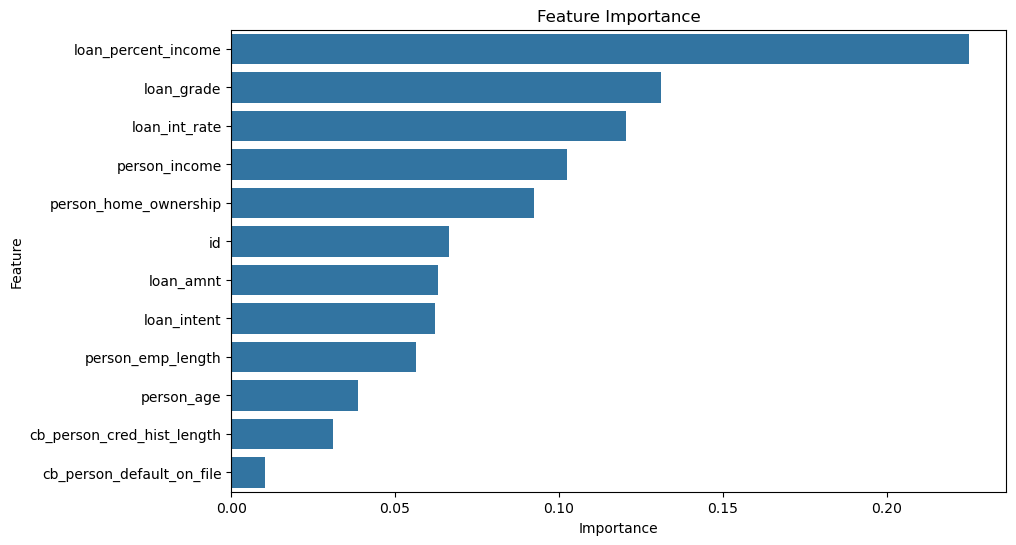

In [298]:
# RandomForest Classifier
# Split the dataset into features (x) and (y)
X = data2.drop(columns=['loan_status'])
y= data2['loan_status']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Depth of the trees
    'min_samples_split': [2, 5, 10],  # Valid integer values
    'min_samples_leaf': [1, 2, 4]  # Valid integer values
}



# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, error_score ='raise')
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_log_model = grid_search.best_estimator_

# Make Predictions
y_pred = best_log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Convert to a pandas DataFrame with labeled rows and columns
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True', 'False'], columns=['Predicted True', 'Predicted False'])

print(conf_matrix_df)

print('\n')

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

print('\n')

# Model Interpretability - seeing which features were most important

feature_importance = rf_model.feature_importances_
feature_names = X.columns  # If X is a DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [ ]:
# Step 2: Use the trained model to make predictions on the test dataset
y_pred_test = best_log_model.predict(test_data_scaled)

# Step 3: If needed, store the predictions (optional)
test['loan_status'] = y_pred_test

# Print the predictions or use it as needed
print(test[['loan_status']].head())


# Step 1: Create submission dataframe 
submission = test[['id','loan_status']]
submission.set_index('id', inplace= True)

# Step 2: Export the dataframe as CSV File 
submission.to_csv('submission.csv')

print(submission.head())